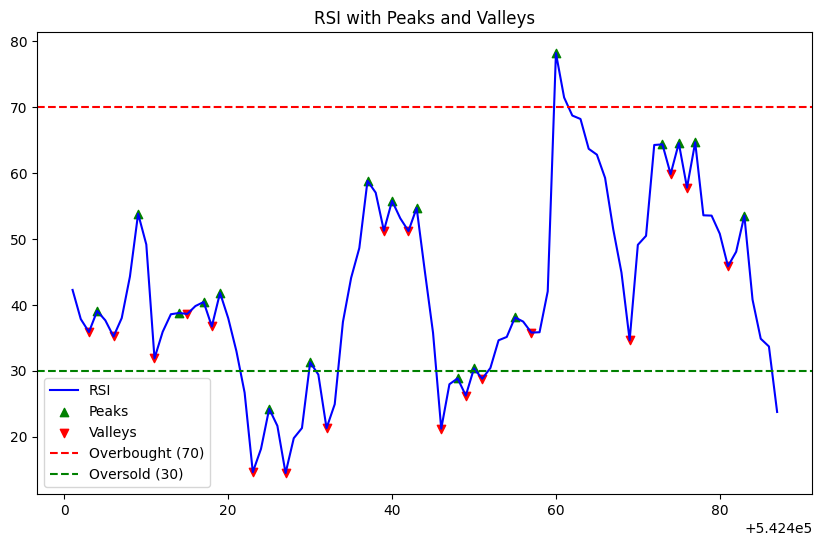

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Sample RSI calculation (You can use actual price data)
def calculate_rsi(data, period=14):
    delta = data['close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to detect peaks and valleys
def find_peaks_and_valleys(rsi):
    peaks = (rsi.shift(1) < rsi) & (rsi.shift(-1) < rsi)
    valleys = (rsi.shift(1) > rsi) & (rsi.shift(-1) > rsi)

    return peaks, valleys

# Plotting the RSI with the peaks and valleys
def plot_rsi_with_peaks_and_valleys(data, rsi, peaks, valleys):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, rsi, label='RSI', color='blue')

    # Plot peaks and valleys
    plt.scatter(data.index[peaks], rsi[peaks], marker='^', color='green', label='Peaks')
    plt.scatter(data.index[valleys], rsi[valleys], marker='v', color='red', label='Valleys')

    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

    plt.title('RSI with Peaks and Valleys')
    plt.legend()
    plt.show()

# Example data
df = pd.read_csv('../DB/5m/BTCUSDT_5m.csv')
df = df[-100:]
# Calculate RSI and find peaks and valleys
rsi = calculate_rsi(df)
peaks, valleys = find_peaks_and_valleys(rsi)

# Plot the RSI with peaks and valleys
plot_rsi_with_peaks_and_valleys(df, rsi, peaks, valleys)
